# **Importing the necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the Boston Dataset
df = pd.read_csv("BostonHousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town B- 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population

* MEDV - Median value of owner-occupied homes in $1000's

# **Business Understanding**
The Boston housing dataset is majorly focused on predicting housing prices in Boston. The stakeholders to the Boston dataset couldn include Investors, Customers intrested in purchasing houses, job seeekers, housing competitors, and the government.

**Problem statement**
The goal is to develop a predictive model that accurately estimates housing prices in the Boston area. The problem arises from the complexity of various factors influencing the prices, such as crime rates, property tax, accessibility to highways, average number of rooms, and environmental quality. By building a reliable model, stakeholders can make informed decisions related to real estate investments, policy-making, market competition, and personal home purchases.

**Objectives**
1. Predicting housing prices using various models
2. Identify key factors influencing housing prices
3. Support decision nmaking for stakeholders
**Research Question**
What are the key factors that influence housing prices in Boston, and how accurately can we predict the prices of homes based on these factors?


**Access Situation**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.isnull().mean()*100

CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64

In [5]:
df.dropna(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


**Continuous Data Plots**
* Histogram
* Scatter Plot
* Box Plot

In [7]:
# Correlation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


**Correlation Interpretation**

Correlation ranges from -1 to +1
* -1 = Perfect negative Correlation
* -0.6 to -0.9 = High Negative Correlation
* -0.3 to -0.5 = Moderate negative correlation
* -0.1 to -0.2 = Low negative correlation

* 0 = No correlation

* +1 = Perfect positive Correlation
* +0.6 to +0.9 = High positive Correlation
* +0.3 to +0.5 = Moderate positive correlation
* +0.1 to +0.2 = Low positive correlation





<Axes: >

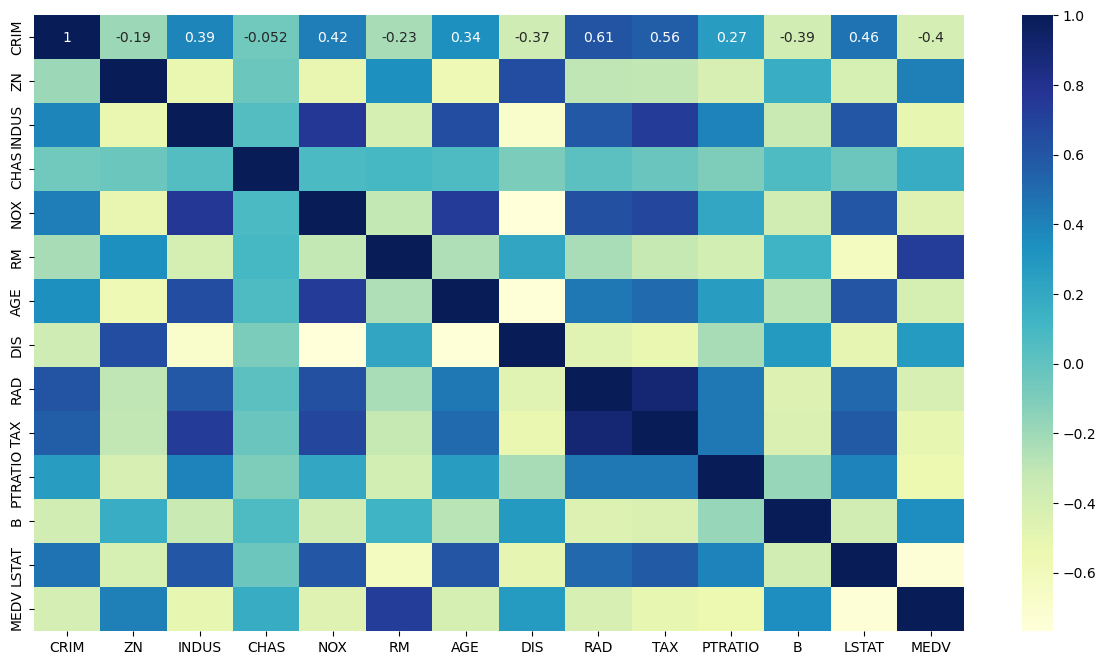

In [8]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")

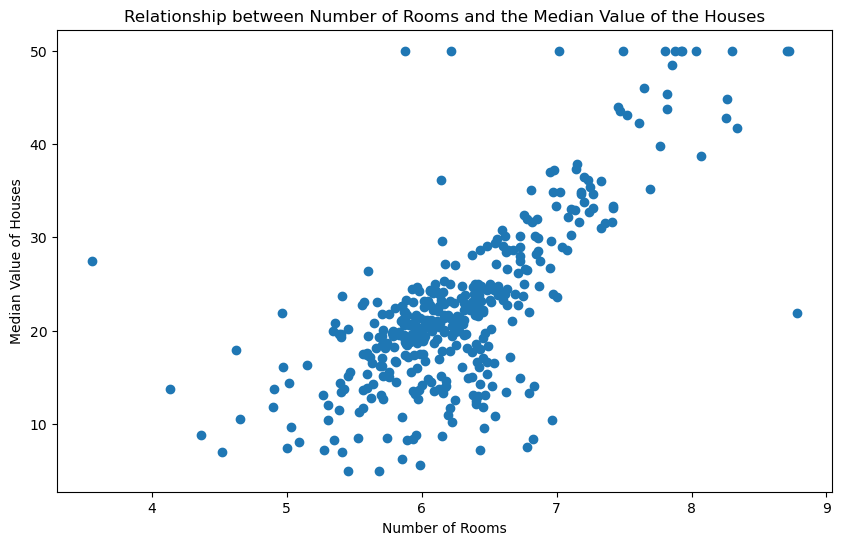

In [9]:
plt.figure(figsize = (10,6))
plt.scatter('RM', 'MEDV', data = df)
plt.xlabel("Number of Rooms")
plt.ylabel("Median Value of Houses")
plt.title("Relationship between Number of Rooms and the Median Value of the Houses")
plt.show()

Y = a + bX



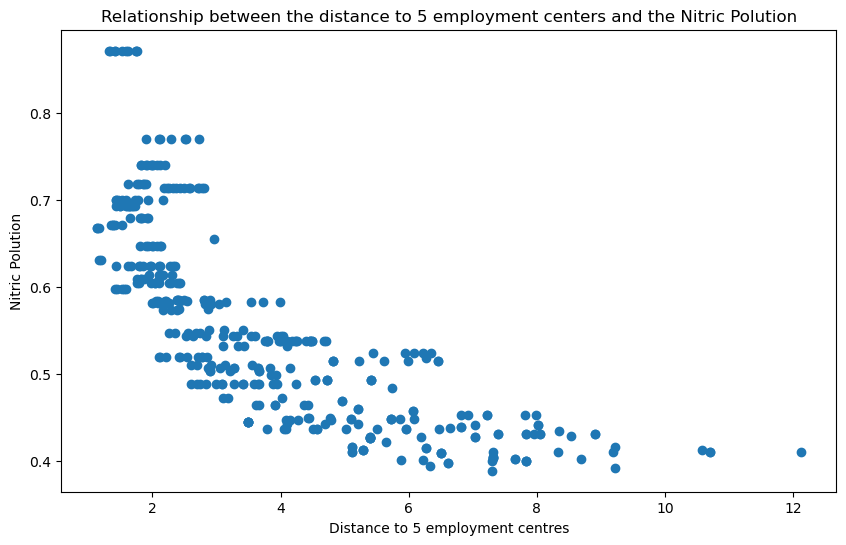

In [10]:
plt.figure(figsize = (10,6))
plt.scatter('DIS', 'NOX', data = df)
plt.xlabel("Distance to 5 employment centres")
plt.ylabel("Nitric Polution")
plt.title("Relationship between the distance to 5 employment centers and the Nitric Polution")
plt.show()

<Axes: >

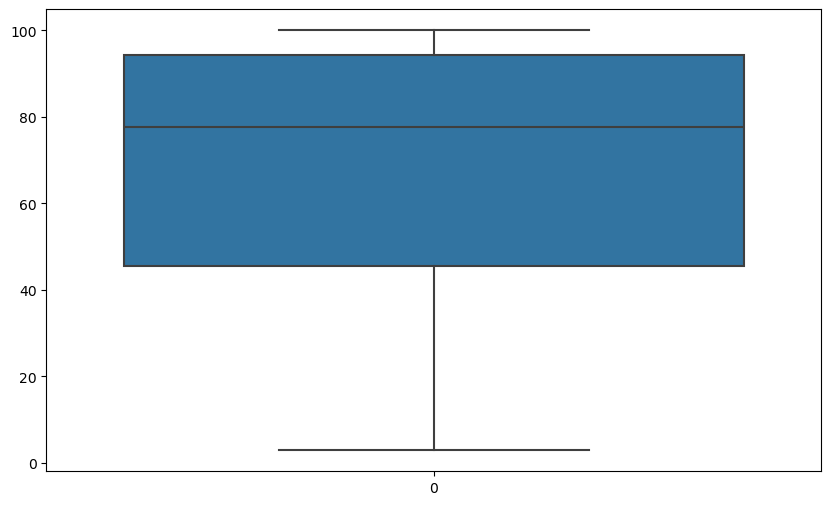

In [11]:
plt.figure(figsize = (10,6))
sns.boxplot(df['AGE'])

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

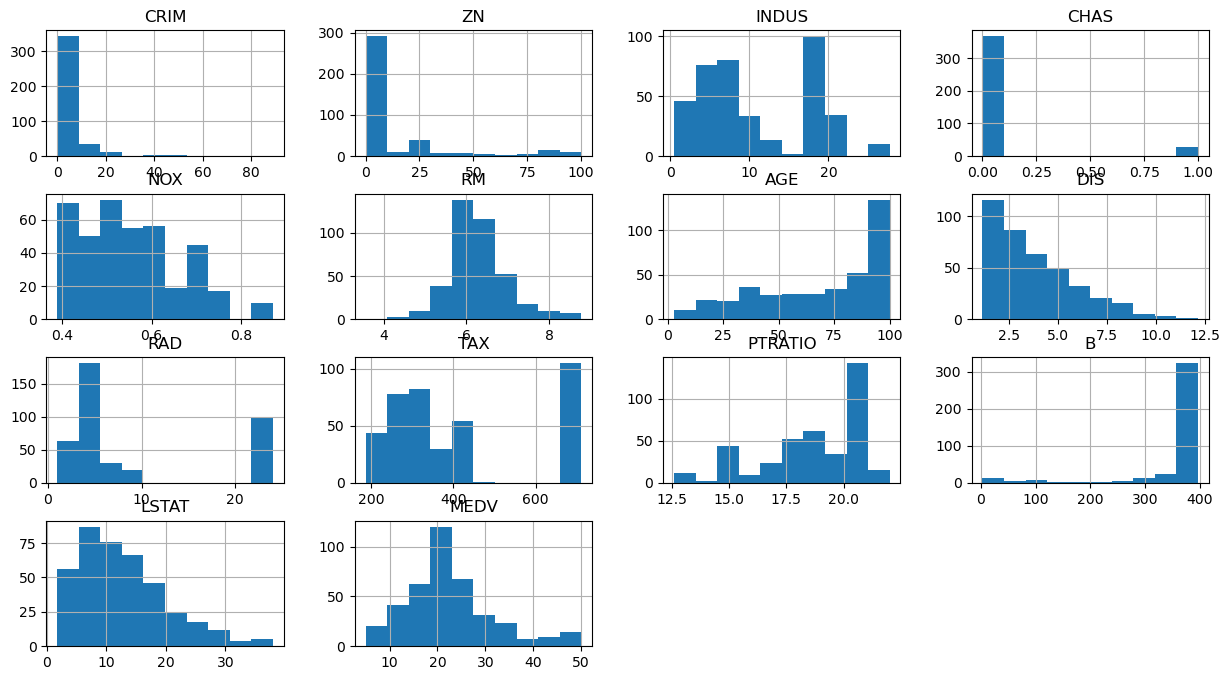

In [12]:
df.hist(figsize = (15,8))

In [13]:
df_cleaned = df.copy()

## **Transforming the Data**
The data is not normally distributed

In [14]:
# Columns to transform
columns_to_transform = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'B', 'MEDV']

# Apply log transformation to the selected columns
for column in columns_to_transform:
    df[column] = np.log1p(df[column])

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

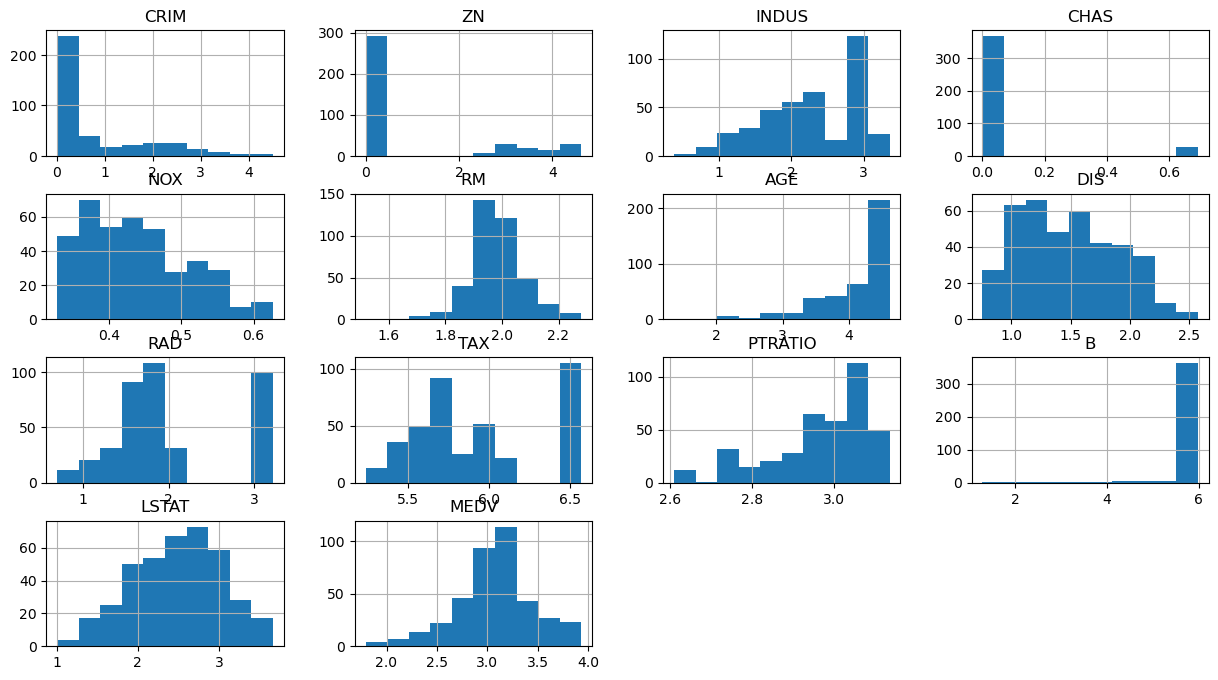

In [15]:
df.hist(figsize = (15,8))

## **Model Building**
### **Linear Regression Model**
**Import the necessary libraries**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Metrics for testing the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [17]:
reg = LinearRegression()

In [18]:
df_x = df.drop(['MEDV'], axis = 1)
df_y = df['MEDV']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.20)

In [20]:
reg.fit(x_train, y_train)

LinearRegression()

In [21]:
y_predicted = np.round(reg.predict(x_test), 1)
y_predicted

array([3. , 2.8, 3.1, 2.7, 3.4, 2.4, 3.2, 3. , 2.8, 3.2, 3.1, 3.1, 3.2,
       3.6, 3.8, 2.7, 2.9, 3.1, 2.9, 3.5, 3.2, 3. , 3.3, 2.8, 3. , 2.5,
       3.2, 3. , 3.7, 2.9, 3. , 3.2, 3.7, 3.4, 3. , 3.1, 2.8, 3.3, 2.6,
       3.3, 2.6, 3.3, 3.1, 2.8, 3.3, 2.9, 3.1, 3.8, 3.1, 3.5, 3.7, 2.8,
       3. , 3.4, 3.2, 3.2, 2.9, 3.2, 3.1, 2.5, 3.3, 3.2, 2.8, 3.3, 3.2,
       3.3, 3. , 2.9, 3.3, 3.5, 3. , 3.3, 3.5, 3.8, 3. , 3.5, 3. , 2.7,
       3.5])

In [22]:
np.round(np.array(y_test), 1)

array([3. , 2.7, 3. , 2.7, 3.4, 2.4, 3.2, 3. , 3.2, 3.2, 3.1, 3.1, 3. ,
       3.5, 3.9, 2.5, 2.9, 3. , 3. , 3.4, 3.2, 3.1, 3.2, 2.7, 2.9, 2.5,
       3.1, 3. , 3.8, 2.9, 3.1, 3.1, 3.9, 3.3, 3.1, 3. , 2.9, 3.1, 2.8,
       3.4, 2.5, 3.2, 3.1, 2.9, 3.2, 2.8, 3.1, 3.9, 3. , 3.6, 3.5, 2.9,
       3. , 3.3, 3. , 3.1, 3. , 3.1, 3.3, 2.7, 3.3, 3.2, 3. , 3.2, 3. ,
       3.2, 3.1, 3. , 3.6, 3.6, 3.1, 3.2, 3.2, 3.9, 2.9, 3.4, 3.1, 2.5,
       3.3])

In [23]:
print(reg.coef_)

[-0.15791774  0.00296872 -0.00172261  0.15002499 -1.19599402  0.31065498
  0.03056113 -0.26712891  0.19378146 -0.14918776 -0.62308815  0.03599721
 -0.41505968]


In [24]:
print(reg.intercept_)

6.535890000615282


In [25]:
mean_squared_error(y_test, y_predicted)

0.0162141716339385

In [26]:
r2_score(y_test, y_predicted)

0.8422664887976387

In [27]:
reg.predict([[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]) # Assuming all other 12 features are 0

C:\Users\perpe\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.06213678])

## **Decision Trees**

In [28]:
df = df_cleaned.copy()

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Know the max_depth and min_samples_leaf needed for the decision tree
from sklearn.model_selection import GridSearchCV

# Checking for the perfomance metrics of the decision tree
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [30]:
df_x = df.drop(['MEDV'], axis = 1)
df_y = df['MEDV']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.20)

In [32]:
param_grid = {
    'max_depth': [1, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 8}


In [33]:
reg = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10, min_samples_leaf = 4)

In [34]:
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4)

In [35]:
y_predicted = np.round(reg.predict(x_test), 1)
y_predicted

array([20.4, 24.2, 18.7, 15.3, 20.4, 12.5, 20.2, 20.4, 14.8, 20.4, 44.5,
       32.1, 12.2, 21.6, 24.2, 23.2, 35.5,  6.2, 25.1, 28. , 28. , 20.4,
       26.4, 17.9, 23.2, 26.1, 28.8, 35.9, 19.5, 17.5, 21.3, 21.5, 16.9,
       39.5, 17.6, 12.3, 20.5, 19. , 39.5, 23.4,  6.2, 15.3, 23.2, 12.5,
       21.6, 26.1, 23.2, 21.3, 12.2, 28. , 25.1,  6.2, 10.1, 44.5, 20.2,
       26.4,  8.6, 19.2, 10.1, 20.5, 17.8, 19.5, 20.4, 25.1, 22.8, 23.2,
       20.4, 21.6, 28. , 39.5, 23.2, 15.3, 24.2, 21.5, 32.1, 35.5, 49.6,
       16.2, 20.4])

In [36]:
np.round(np.array(y_test), 1)

array([20.8, 22.5, 23.1, 14.8, 36.2,  8.1, 20. , 20.1, 12.5, 22.2, 45.4,
       35.1, 11.8, 20.8, 26.2, 23. , 32.2, 17.2, 22.8, 28.4, 23.9, 21.7,
       29.9, 18.6, 21.6, 20.6, 31.7, 42.8, 23.1, 18. , 20.9, 13.6, 14.3,
       23.9, 18.7,  8.8, 21.2, 19.5, 33.8, 24. , 13.8, 16.1, 25. , 11.8,
       23. , 21.6, 24.3, 21.7,  8.5, 29. , 20.6,  8.7,  5. , 46. , 19. ,
       30.1,  6.3, 19.4,  8.3, 22.2, 17.1, 19.5, 19.2, 20.7, 13.2, 24.2,
       28.7, 21.7, 26.6, 31. , 23.9, 13.1, 24.8, 18.8, 24.8, 34.9, 42.3,
       18.9, 22.6])

In [37]:
mean_squared_error(y_test, y_predicted)

19.198607594936707

In [38]:
r2_score(y_test, y_predicted)

0.7306917253992418

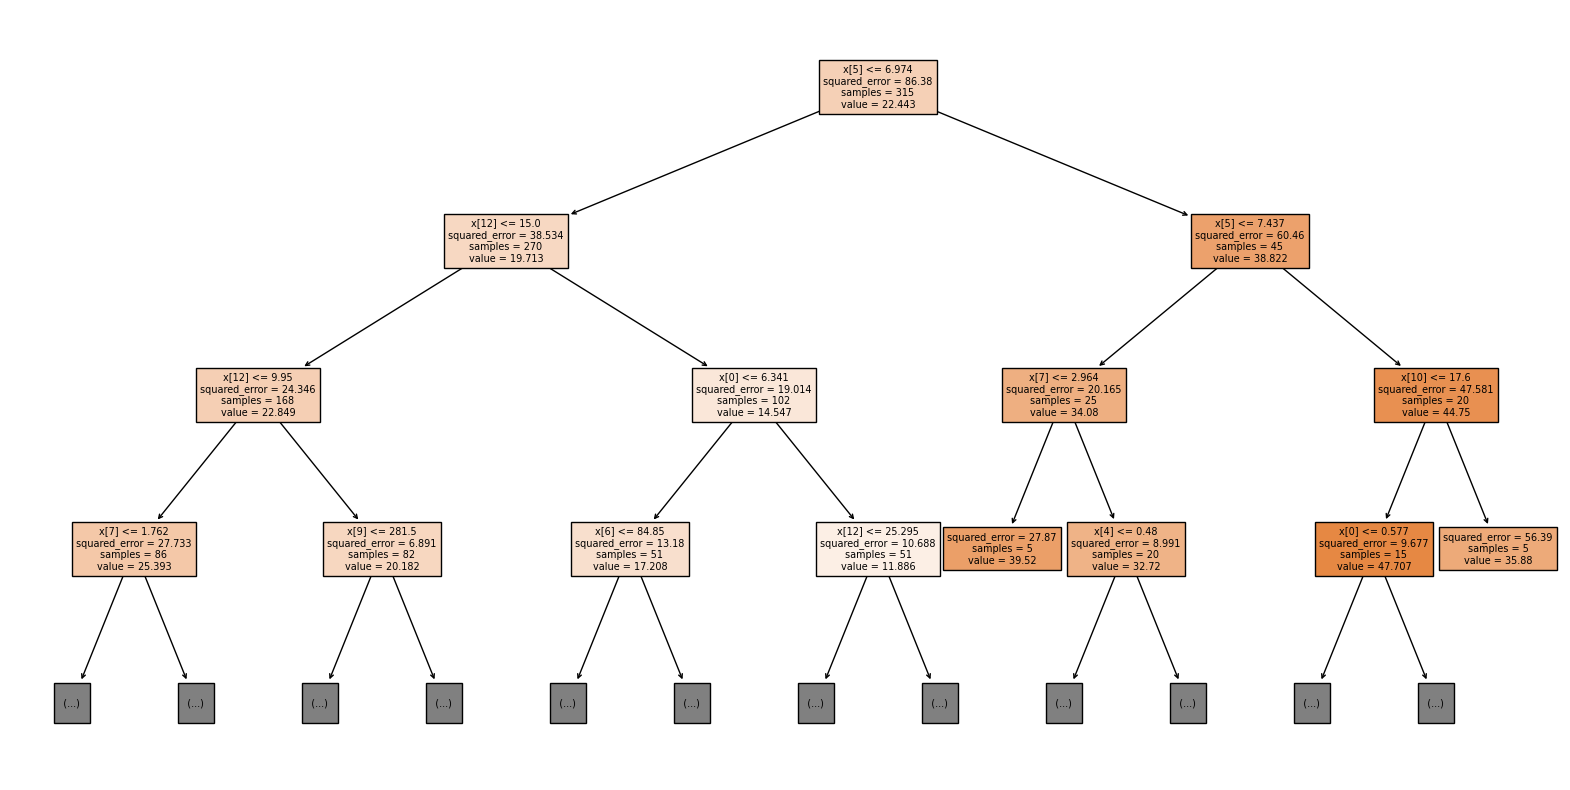

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,10))
plot_tree(reg, filled = True, max_depth = 3)
plt.show()

## **Random Forest**

In [40]:
df = df_cleaned.copy()

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Library to use for the Hyperparameters for the RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Checking for the perfomance metrics of the decision tree
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [42]:
df_x = df.drop(['MEDV'], axis = 1)
df_y = df['MEDV']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.20)

In [44]:
# Knowing the hyperparameters for the Random Forest
hyper_parameters = RandomizedSearchCV(
    estimator=RandomForestRegressor(), # Add the estimator here
    param_distributions={ # Pass n_estimators within param_distributions
        'n_estimators': [100],
        'max_depth': [int(x) for x in np.linspace(10, 120, num = 12)],
        'min_samples_split': [2, 6, 10],
        'min_samples_leaf': [1, 3, 4],
        'bootstrap': [True, False]
    }
)

hyper_parameters.fit(x_train, y_train)
print(hyper_parameters.best_params_)

{'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 100, 'bootstrap': True}


In [45]:
forest = RandomForestRegressor(n_estimators = 100, max_depth = 10, min_samples_split = 2, 
                               min_samples_leaf = 1, bootstrap = True)

In [46]:
forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=10)

In [47]:
y_predicted = np.round(reg.predict(x_test), 1)
y_predicted

array([17.6, 24.2, 44.5, 32.1, 13.1, 17.9, 18.7, 44.5, 26.4, 50. , 20.4,
       30.4, 21.5, 21.5, 14.7, 24.2, 17.6, 21.6, 14.7, 17.9, 16.2, 20.4,
       22.8, 25.1, 23.2, 15.9, 50. , 23.2, 18.7, 28.8,  8.6, 26.1, 23.2,
       19.5, 10.1,  6.2, 12.6, 24.2, 28.8, 35.5, 10.1, 26.4, 28. , 21.3,
       24.2, 26.4, 20.4, 20.2, 21.1, 19.7, 25.1, 15.9, 19.2, 24.2, 12.2,
       21.3, 21.6, 15.3, 38. , 21.6, 16.9, 13.1, 18.7, 17.8, 19. , 28. ,
       23.4, 10.1, 22.8, 39.5, 20.2, 21.6, 21.1, 23.2, 22.8, 20.2, 21.5,
       17.9, 28. ])

In [48]:
np.round(np.array(y_test), 1)

array([17.2, 24.5, 46. , 32. , 12.7, 15. , 18.5, 41.7, 23.9, 50. , 19.2,
       28.5, 19.5, 18.8, 12. , 23.8, 18.9, 21.4, 16.3, 20.8, 17.5, 22.6,
       13.2, 29.6, 23. , 14.2, 50. , 24.2, 19.4, 31.5,  7.4, 29.1, 23.8,
       20.4, 13.1,  8.7, 11.7, 23.3, 28.7, 34.9,  8.4, 30.1, 28. , 21.7,
       24.8, 29.9, 18.5, 20.1, 22.7, 20. , 20.6, 13.8, 19.8, 23.5, 13.3,
       20.9, 21.2, 15.2, 24.3, 21.2, 19.1, 13.1, 20.3, 19.9, 19.3, 28.4,
       23.3, 10.8, 21.7, 33.8, 20.6, 20.6, 23.1, 22.1, 23.7, 19.1, 13.6,
       18.6, 29. ])

In [49]:
mean_squared_error(y_test, y_predicted)

7.471772151898734

In [50]:
r2_score(y_test, y_predicted)

0.8892616396162154

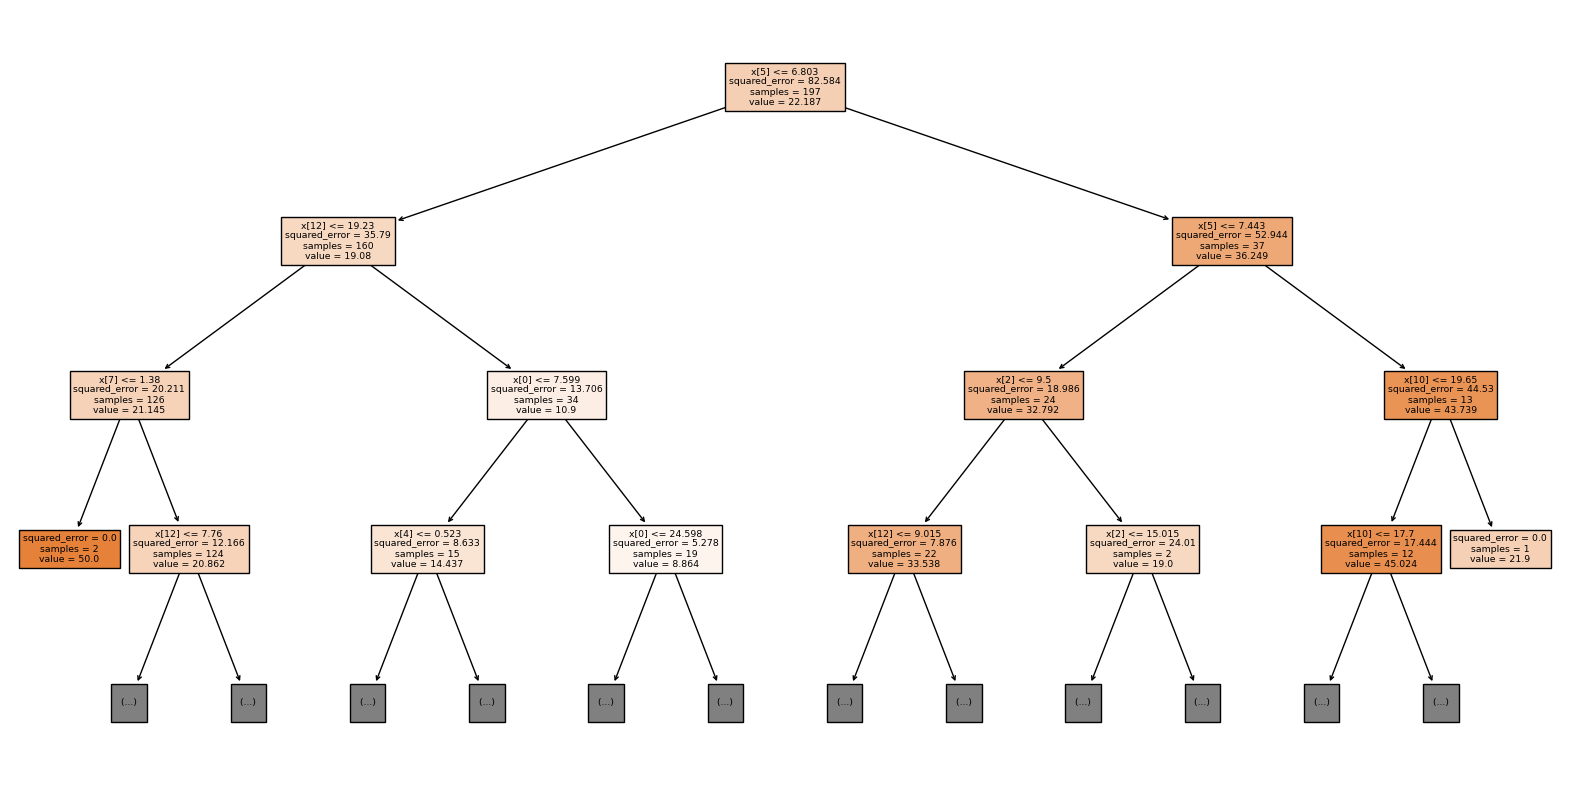

In [51]:
# Random Forest Plot
plt.figure(figsize = (20,10))
plot_tree(forest.estimators_[0], filled = True, max_depth = 3)
plt.show()

## **Support Vector Machine**

In [52]:
df = df_cleaned.copy()

In [53]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Library to use for the Hyperparameters for the Support Vector Regressor
from sklearn.model_selection import RandomizedSearchCV

# Checking for the perfomance metrics of the decision tree
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [54]:
df_x = df.drop(['MEDV'], axis = 1)
df_y = df['MEDV']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.20)

In [56]:
# Knowing the hyperparameters for the Random Forest
hyper_parameters = RandomizedSearchCV(
    estimator=SVR(), # Add the estimator here
    param_distributions={ # Pass n_estimators within param_distributions
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto']
    }
)

#hyper_parameters.fit(x_train, y_train)
#print(hyper_parameters.best_params_)

In [57]:
svm_reg = SVR(kernel = 'linear', C = 10, gamma = 'scale')

In [58]:
svm_reg.fit(x_train, y_train)

SVR(C=10, kernel='linear')

In [59]:
y_predicted = np.round(reg.predict(x_test), 1)
y_predicted

array([23.4, 23.2, 16.9, 24.2,  8.6, 17.9, 13.1, 20.4, 49.6, 20.4, 38. ,
       39.5, 10.1, 21.6, 13.1, 14.8, 12.5, 15.3, 20.5, 17.5, 22.8, 17.6,
       17.6, 23.2, 49.6, 12.2, 19.2, 33.4, 15.3, 20.2, 24.2, 35.9, 23.4,
       19. , 10.1, 49.6, 21.3, 28.8, 17.6, 20.5, 26.1, 12.2, 17.5, 14.8,
        6.2, 19.7, 50. ,  8.6, 30.4, 19.5, 17.6, 23.4, 26.1, 18.7, 26.4,
       50. , 19.5, 14.7, 12.6, 19.7, 16.2, 19. , 12.6, 24.2, 21.6, 15.3,
       39.5, 38. , 33.4, 20.2, 21.1, 12.2, 23.2, 17.5, 12.3, 28. , 21.3,
       20.5, 24.9])

In [60]:
np.round(np.array(y_test), 1)

array([22.9, 23.8, 19.1, 26.2,  8.4, 20.2, 13.6, 20.7, 48.5, 19.6, 27.5,
       50. ,  8.3, 22.8, 13.5, 15.6, 11.8, 13.1, 21. , 17. , 22.4, 18.7,
       18.9, 22.1, 50. , 11. , 19.4, 33.4, 15.2, 20.4, 25. , 42.8, 23.2,
       19.5, 10.8, 50. , 21.7, 31.6, 17.1, 20.5, 25. , 11.5, 19.4, 12.5,
       13.8, 19.3, 50. ,  7.4, 30.8, 19.6, 17.2, 24. , 25.3, 19.4, 27.5,
       50. , 20.4, 16.3, 11.7, 20. , 14.5, 19.4, 13.5, 23.3, 21.8, 13.9,
       37.2, 50. , 33.2, 20. , 19.1,  8.5, 23.1, 15.6,  8.8, 26.6, 21.4,
       22.2, 25. ])

In [61]:
mean_squared_error(y_test, y_predicted)

7.39126582278481

In [62]:
r2_score(y_test, y_predicted)

0.9355095540288177